# ResNet

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow

In [48]:
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in pretrained_model.layers:
    layer.trainable = False

In [51]:
model = Sequential()

model.add(pretrained_model)
model.add(Flatten())


model.add(Dense(units=128,
                activation="relu"))

model.add(Dropout(rate=0.4))

model.add(Dense(units=10,
                activation="softmax"))

optimizer = tensorflow.keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\youngjae\miniconda3\envs\dt\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [53]:
early_stopping = EarlyStopping(patience=8)
model_checkpoint = ModelCheckpoint('./best_cnn_transfer_learning.h5', save_best_only=True)

In [54]:
# 데이터 로드
x_data = np.load('./npy/x_data_all.npy')
t_data = np.load('./npy/t_data_all.npy')

In [55]:
# 정규화
x_data = x_data.astype('float64')
x_data /= 255.0

In [56]:
# one hot encoding
lb = LabelBinarizer()
t_data = lb.fit_transform(t_data)

In [57]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(x_data,
                                                  t_data,
                                                  test_size=0.15,
                                                  random_state=22)

In [59]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [60]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                              epochs=100, validation_data=(X_val, y_val),
                              callbacks=[model_checkpoint])

Epoch 1/100


C:\Users\youngjae\AppData\Local\Temp\ipykernel_11404\1561068068.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),


973/973 [==============================] - 25s 24ms/step - loss: 2.2503 - accuracy: 0.1864 - val_loss: 2.2163 - val_accuracy: 0.1867
Epoch 2/100
973/973 [==============================] - 23s 24ms/step - loss: 2.2126 - accuracy: 0.1899 - val_loss: 2.1755 - val_accuracy: 0.2230
Epoch 3/100
973/973 [==============================] - 23s 23ms/step - loss: 2.1861 - accuracy: 0.2068 - val_loss: 2.1436 - val_accuracy: 0.2519
Epoch 4/100
973/973 [==============================] - 23s 23ms/step - loss: 2.1746 - accuracy: 0.2121 - val_loss: 2.1435 - val_accuracy: 0.2706
Epoch 5/100
973/973 [==============================] - 23s 24ms/step - loss: 2.1648 - accuracy: 0.2168 - val_loss: 2.1251 - val_accuracy: 0.2734
Epoch 6/100
973/973 [==============================] - 24s 25ms/step - loss: 2.1627 - accuracy: 0.2184 - val_loss: 2.2316 - val_accuracy: 0.1780
Epoch 7/100
973/973 [==============================] - 24s 25ms/step - loss: 2.1603 - accuracy: 0.2192 - val_loss: 2.1247 - val_accuracy: 0.27

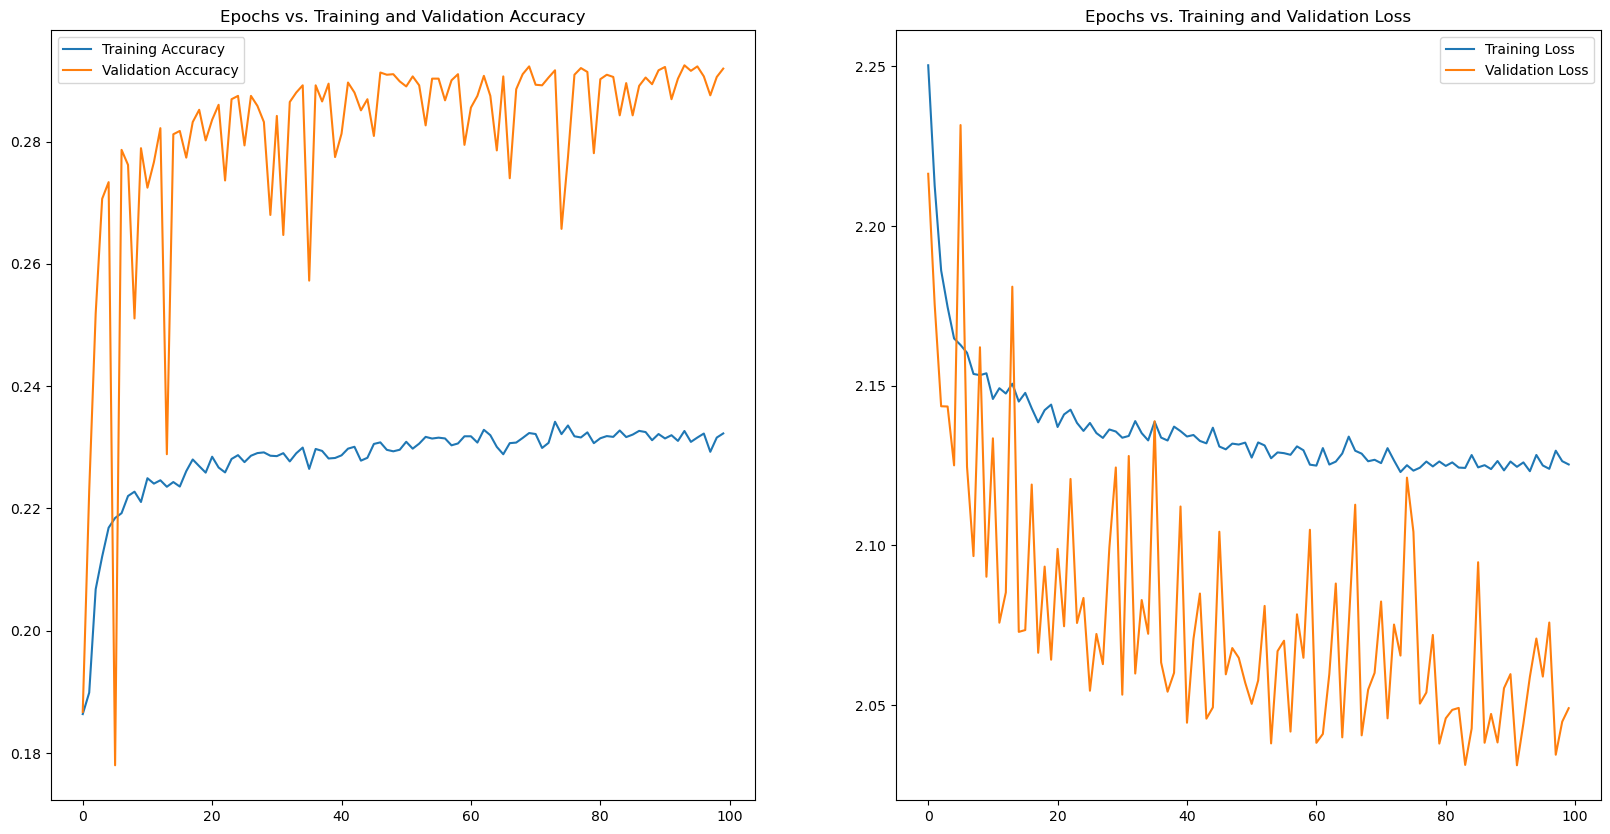

In [62]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

------

# VGG

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import tensorflow

In [3]:
model_base = VGG16(weights="imagenet",
                   include_top=False,
                   input_shape=(32,32,3))

In [26]:
model = Sequential()

model.add(model_base)

model.add(Flatten())

model.add(Dense(units=128,
                activation="relu"))

model.add(Dropout(rate=0.4))

model.add(Dense(units=10,
                activation="softmax"))

optimizer = tensorflow.keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\youngjae\miniconda3\envs\dt\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(x_data,
                                                  t_data,
                                                  test_size=0.15,
                                                  random_state=22)

In [30]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [31]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=70, validation_data=(X_val, y_val),
                              callbacks=[model_checkpoint])

Epoch 1/70


C:\Users\youngjae\AppData\Local\Temp\ipykernel_11404\1910126075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),


487/487 [==============================] - 23s 43ms/step - loss: 1.2357 - accuracy: 0.5786 - val_loss: 0.4746 - val_accuracy: 0.8602
Epoch 2/70
487/487 [==============================] - 20s 40ms/step - loss: 0.4344 - accuracy: 0.8813 - val_loss: 0.3270 - val_accuracy: 0.9110
Epoch 3/70
487/487 [==============================] - 20s 41ms/step - loss: 0.3502 - accuracy: 0.9052 - val_loss: 0.2933 - val_accuracy: 0.9188
Epoch 4/70
487/487 [==============================] - 19s 40ms/step - loss: 0.3033 - accuracy: 0.9186 - val_loss: 0.2550 - val_accuracy: 0.9317
Epoch 5/70
487/487 [==============================] - 20s 41ms/step - loss: 0.2756 - accuracy: 0.9263 - val_loss: 0.2494 - val_accuracy: 0.9308
Epoch 6/70
487/487 [==============================] - 20s 42ms/step - loss: 0.2586 - accuracy: 0.9315 - val_loss: 0.2653 - val_accuracy: 0.9261
Epoch 7/70
487/487 [==============================] - 21s 43ms/step - loss: 0.2419 - accuracy: 0.9352 - val_loss: 0.2399 - val_accuracy: 0.9375
Epo

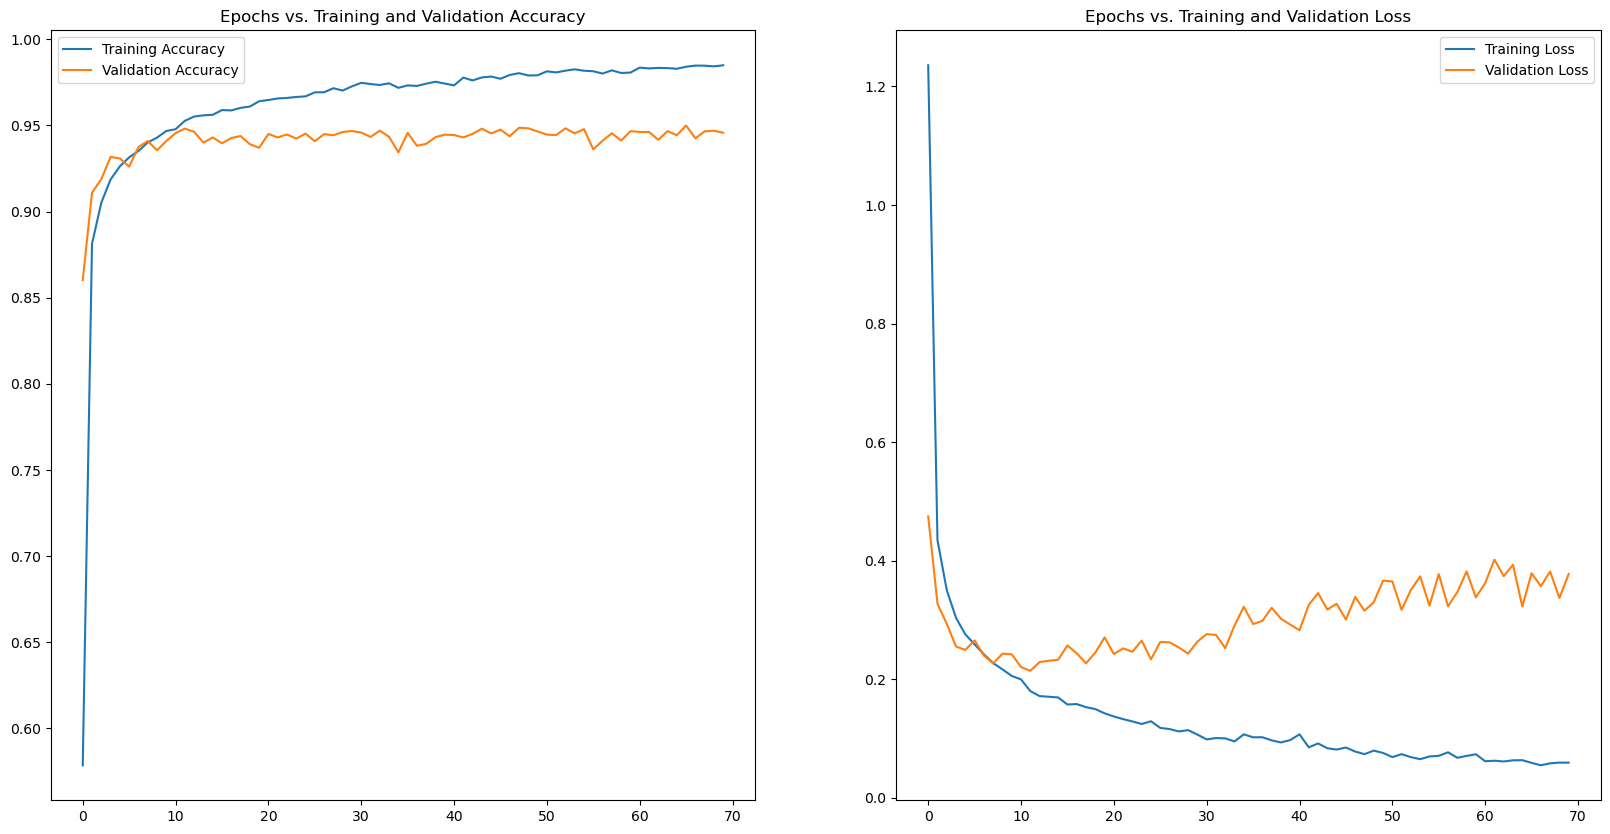

In [32]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [35]:
# test 데이터 로드

data = pd.read_csv("./csv/data.csv")

data.columns

Index(['파일명', 'height', 'left', 'top', 'width', 'label '], dtype='object')

In [38]:
# 데이터 전처리
loc = "./data/데이터톤 테스트셋 image/"

from PIL import Image

def get_data(df, loc):

  x_data = []
  t_data = []

  for index, row in df.iterrows():
    # csv파일의 데이터들을 분류
    img = row["파일명"]
    left = row["left"]
    upper = row["top"]
    right = left + row["width"]
    lower = upper + row["height"]
    number = row["label "]

    image = Image.open(f"{loc}/{img}")  # 이미지 불러오기
    num_img = image.crop((left, upper, right, lower))  # 이미지에서 숫자영역 크롭
    resize_img = num_img.resize((32, 32))  # 크롭된 이미지 리사이징(32, 32)
    img_data = np.array(resize_img)  # np array 픽셀 데이터로 변환

    x_data.append(img_data)
    t_data.append(number)

  x_data = np.array(x_data)
  t_data = np.array(t_data)

  return x_data, t_data

x_test, t_test = get_data(data,loc)

In [39]:
# 정규화
x_test = x_test.astype('float64')
x_test /= 255.0

In [40]:
# one hot encoding
lb = LabelBinarizer()
t_test = lb.fit_transform(t_test)

In [42]:
test_loss, test_acc = model.evaluate(x=x_test, y=t_test, verbose=1)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

15/15 [==============================] - 0s 5ms/step - loss: 0.0692 - accuracy: 0.9833
Test accuracy is: 0.9833 
Test loss is: 0.0692


In [43]:
x_test2 = np.load("./npy/x_data2.npy")
t_test2 = np.load("./npy/t_data2.npy")

In [45]:
# 정규화
x_test2 = x_test2.astype('float64')
x_test2 /= 255.0

In [46]:
# one hot encoding
lb = LabelBinarizer()
t_test2 = lb.fit_transform(t_test2)

In [47]:
test_loss, test_acc = model.evaluate(x=x_test2, y=t_test2, verbose=1)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

814/814 [==============================] - 4s 5ms/step - loss: 0.3652 - accuracy: 0.9449
Test accuracy is: 0.9449 
Test loss is: 0.3652
